In [19]:
import infrared as ir
import infrared.rna as rna
import matplotlib.pyplot as plt
import copy

In [20]:
import random
import math
import RNA
from RNA import energy_of_struct

In [24]:
def draw_logo(sequences,name=None):
    import logomaker as lm
    
    matrix = lm.alignment_to_matrix(sequences = sequences)
    logo = lm.Logo(matrix)
    logo.style_xticks(rotation=90, fmt='%d', anchor=0)
    logo.ax.xaxis.set_ticks_position('none')
    if name is not None:
        plt.savefig(name)
    plt.show()
    logo.ax.xaxis.set_tick_params(pad=-1)
    return sequences

def opt_draw_logo(sequences,name=None,num=10):
    try:
        draw_logo(sequences,name)
    except ModuleNotFoundError as e:
        print(e)

def assignments_to_seqs(xs):
    return [rna.ass_to_seq(x) for x in xs]

In [25]:
class NeighborGenerator:
    def __init__(self, model, const_td_factory, weight):
        self.model = model
        self.const_td_factory = const_td_factory
        self.weight = weight
        self.sampler = ir.Sampler(self.model, td_factory=self.const_td_factory)
    
    def generate_neighbour(self, sample, add_func):
        m_prime = copy.deepcopy(self.model)
        m_prime.add_functions([add_func(i,val) for (i,val) in enumerate(sample.values())], 'added_func')
        m_prime.set_feature_weight(self.weight, 'added_func')
        return self.sampler.sample()
    
    def generate_initial_sample(self):
        return self.sampler.sample()

    
class ConstTDFactory:
    """@brief TD factory returning a constant TD
    Allows to pass and reuse an already computed TD 
    """
    def __init__(self,td):
        self._td = td
    def create(self,_size,_dependencies):
        return self._td    
    

In [26]:
n=35
m=4

targets = ["((((((((((...))))((((....))))))))))",
           "((((((.((((((((....))))..))))))))))",
           ".((((((...)))))).(((((((....)))))))"]

model = ir.Model(n,m)
model.add_functions([rna.GCCont(i) for i in range(n)], 'gc')
model.set_feature_weight(1, 'gc')



for k, target in enumerate(targets):
    bps = rna.parse(target)
    model.add_constraints(rna.BPComp(i, j) for (i, j) in bps)
    model.add_functions([rna.BPEnergy(i, j, (i-1, j+1) not in bps)
    for (i, j) in bps], f'energy{k}')
    
original_sampler = ir.Sampler(model)
original_td = original_sampler.td
const_td_factory = ConstTDFactory(original_td)


ir.def_function_class(
    'hammingdistance',
    lambda i,y: [i],
    lambda x,y: 0 if x==y else 1
    )

add_func = hammingdistance

weight = -4

ng = NeighborGenerator(model, const_td_factory, weight)
initial_sample = ng.generate_initial_sample()

Neighbours: Weight = -3
1: GGGGCGCGGGGUGCCUGGGGGCGGCCCCCUGCUCC
2: UUUUGUGCCCCGCGGGCCCCCGUCUGGGGGUGGGG
3: CCCCCCGCUUCGGGGGUCUCUCCCAGGAGGGGGGG
4: UUCUCGGUCUCUGGGGCCCUCCGCGGAGGCGGGGG
5: UCCUGCGCCUUGCAGGCUUCUGCCGGGGGGUGGGG
6: GGGGGGUGGGGUCCCCGAGGGGGGGCCCUCCCCUU
7: CCCCCUGCUCCGGGGGCCCCCCUCCGGGGGGGGGG
8: CUCCCUGCUCCGGGGGCCCCCCCCCGGGGGGGGGG
9: CCCCUAGCCCCUGGGGCCCCUCGCGGGGGUGGGGG
10: CUUCGCGUUCUGUGGGUUCCCGCCGGGGGGCGGGG
11: CCCCGGGUCCCUCGGGUCCUCGGCGGGGGCCGGGG
12: UCUUCGGCCCCCGGGGUCCCCCGCUGGGGUGGGGG
13: UCCCGCGCUCCGCGGGCCCCCGCCUGGGGGCGGGG
14: CUCCGCGUCCUGCGGGUUUCCGCCCGGGGGCGGGG
15: CUCCGGGUCCCUCGGACCCCCGGUCGGGGCCGGGG
16: CCCUCCGCCUCGGAGGCCCUUCUCCGGGGGGGGGG
17: CUUCGGGUCCCCCGGGUCUCCGGCGGGGGCCGGGG
18: CUCUGUGUCCCGCGGACCUCCGCUCGGGGGCGGGG
19: CCCCGCGCCCCGCGGGCCUCCGCCAGGGGGCGGGG
20: CCCCGCGCCCCGUGGGCUCCCGCCGGGGGGCGGGG
21: UUCCCCGUCCCGGGGGUUUCUCCCGGGGGGGGGGG
22: CUCUCGGCCUCCGGGGCCCCUUGUCGGGGCGAGGG
23: AGGACGCGAGGUGUUCGGGGGCGGGCCUCCGUCCU
24: GGGGGGCGGGGCUUCUGGGGGGGGCUCUCCUCCUU
25: CCCUGGGCUCCUUGGGCUCCU

/home/elena/miniconda3/envs/myenv/lib/python3.10/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


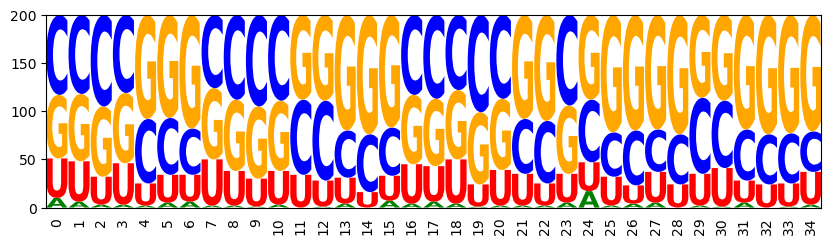

In [27]:
rna_sequences=[]
iterations = 200

curr = initial_sample
print("Neighbours: Weight = -4")
for i in range(iterations):
    neighbour = ng.generate_neighbour(initial_sample, add_func)
    rna_sequences.append(rna.ass_to_seq(neighbour))
    print(str(i+1) + ": "+ rna.ass_to_seq(neighbour))
    
opt_draw_logo(rna_sequences)

Neighbours: Weight = -7
1: GGGGCGCGGGGUGCUCGGGGGCGGCUCCCCGCCCU
2: UCCUCGGCUCCCGGGGCCUCUCGCUGGGGCGAGGG
3: CUCCUUGUCCCAGGGACUUCCUUUCGGGAAGGGGG
4: UUCUGCGUCCUGCGGGCUUCUGCCAGGGGGCGGGA
5: AGGGCCUGGGGGGCCUGGGGGCCGCCCCCGGCUCU
6: CCUCCGGCCCCCGGGGCCCCCUGUGGGGGCGGGGG
7: CCCUGCGCUCCGCGGGUUUCCGUCGGGAGGCGGGG
8: UUUCCGGCUCCCGGGGCCUCCUGCGGGAGCGGGGG
9: GGGGGCUAGGGGCUCUGGGGGGCGACCCUGCUCCC
10: GGGGGUCGGGGGCCUCGGGGGGCGAUUCCGUCUCC
11: GGGGGGCGGGGCCCCUGGGGGGGGGCCCCCCCCUC
12: CCCUCCGCCCUGGGGGCCCUCCCCAGGGGGGGGGG
13: GGGGCUCGGGGGGUUUGGGGGUUGGCCCCAGUCCC
14: GGGGGGCGGGGUUCCCGGGGGGAGUCUUCUCCCCC
15: UUCCGGGCCCUCUGGGUCCCUAGUUAGGGCUGGGG
16: GGGGCCUAGGAGGCCUAGGGGUUGCUCUUGGCCCC
17: UCUUCUGUUUUGGGAGCCCUCCCUAGGGGGGGGGG
18: CUCCUGGUCCCUGGGGCCUCCCGCGGGGGUGGGGG
19: CCCUGUGUUUCGCGGGCCCCUGCCCGGGGGCGGGG
20: UCUCGUGCCUUGCGGGUCUCCGUCGGGGGGCGGGG
21: CCCCGGGCCCCCCGGGCCCCCGGCUGGGGCCGGGG
22: GGGGGCCGGGGGUUCUGGGGGGUGGCCCCGCUCUC
23: UCCCUGGCUCCUGGGGCCCUCUGCGGGGGCAGGGG
24: CCCCGCGUUCCGCGGGCCUCCGCCCGGGGGCGGGG
25: CCUUUGGCCCCCGGGGCUCCC

/home/elena/miniconda3/envs/myenv/lib/python3.10/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


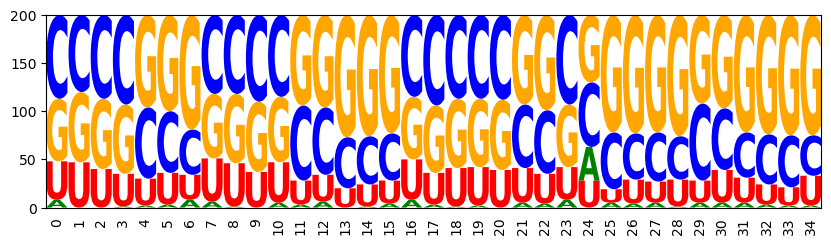

In [28]:
weight = -7

ng = NeighborGenerator(model, const_td_factory, weight)
initial_sample = ng.generate_initial_sample()

rna_sequences2=[]
iterations = 200

curr = initial_sample
print("Neighbours: Weight = -7")
for i in range(iterations):
    neighbour = ng.generate_neighbour(initial_sample, add_func)
    rna_sequences2.append(rna.ass_to_seq(neighbour))
    print(str(i+1) + ": "+ rna.ass_to_seq(neighbour))
    
opt_draw_logo(rna_sequences2)